In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

# Display all columns
pd.set_option('display.max_columns', None)  # or pd.set_option('display.max_columns', number_of_columns)


In [2]:
#import the audio parquet
spotify_df = pd.read_parquet("../Data/my_spotify_data/Spotify Extended Streaming History/collated_spotify_audio.parquet")

#look at first couple rows
spotify_df.head(5)

,ts,platform,ms_played,conn_country,ip_addr,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,spotify_track_uri,episode_name,episode_show_name,spotify_episode_uri,audiobook_title,audiobook_uri,audiobook_chapter_uri,audiobook_chapter_title,reason_start,reason_end,shuffle,skipped,offline,offline_timestamp,incognito_mode
0,2014-02-23T00:40:19Z,Windows 7 (6.1.7601; x64; SP1; S),436960,US,134.129.174.115,Fear of the Dark,Iron Maiden,Fear of the Dark,spotify:track:0PLUzbu0ST6IOSgtUknxWV,None,None,None,None,None,None,None,unknown,trackdone,False,False,False,NaN,False
1,2014-02-23T00:42:06Z,Windows 7 (6.1.7601; x64; SP1; S),107887,US,134.129.174.115,Kings And Queens,Thirty Seconds To Mars,This Is War,spotify:track:4sjLcE0GQ6urc4iUXsUPe9,None,None,None,None,None,None,None,trackdone,unknown,False,True,False,NaN,False
2,2014-02-23T00:45:42Z,Windows 7 (6.1.7601; x64; SP1; S),215533,US,134.129.174.115,Every Night,Imagine Dragons,Night Visions,spotify:track:3WQZfz5DLbO2vnJDWNxRBf,None,None,None,None,None,None,None,unknown,trackdone,False,False,False,NaN,False
3,2014-02-23T00:46:39Z,Windows 7 (6.1.7601; x64; SP1; S),57413,US,134.129.174.115,What You Wanted,OneRepublic,Native,spotify:track:4MCuoA53lZFj4EiBFYv1B2,None,None,None,None,None,None,None,trackdone,endplay,False,True,False,NaN,False
4,2014-02-23T04:02:00Z,Windows 7 (6.1.7601; x64; SP1; S),113067,US,134.129.174.115,What You Wanted,OneRepublic,Native,spotify:track:4MCuoA53lZFj4EiBFYv1B2,None,None,None,None,None,None,None,appload,endplay,False,True,False,NaN,False


In [3]:
#create a year column from the ts column
spotify_df["year"] = pd.to_datetime(spotify_df["ts"]).dt.year

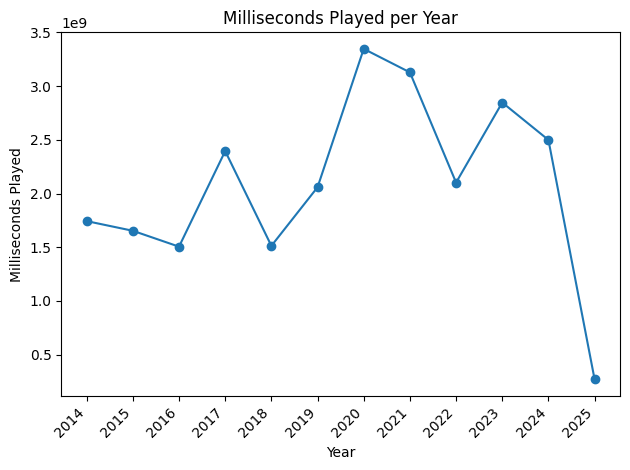

In [4]:
# Group by year and sum ms_played
yearly_ms_played = spotify_df.groupby(["year"])["ms_played"].sum()

# Create the plot
ax = yearly_ms_played.plot(marker = "o")

# Get the unique years from the index
years = yearly_ms_played.index.unique()

# Set the x-axis ticks and labels
ax.set_xticks(years)  # Set tick *locations*
ax.set_xticklabels(years, rotation=45, ha="right") # Set tick *labels* and rotate for readability

# Improve plot aesthetics (optional)
plt.xlabel("Year")
plt.ylabel("Milliseconds Played")
plt.title("Milliseconds Played per Year")
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()


In [5]:
# Convert 'ts' to datetime objects
spotify_df['ts'] = pd.to_datetime(spotify_df['ts'])

# Extract year, month, and day of year
spotify_df['month'] = spotify_df['ts'].dt.month
spotify_df['day_of_year'] = spotify_df['ts'].dt.dayofyear

# Sort by 'ts' (important for cumulative sum)
spotify_df = spotify_df.sort_values('ts')

#create a smaller dataframe by day vs every single record
year_cum_df = spotify_df.groupby(["year","day_of_year"])["ms_played"].sum().reset_index()

In [6]:
#create cummulative sum
year_cum_df["cum_sum_played"] = year_cum_df.groupby(["year"])["ms_played"].cumsum()

#view first couple records
year_cum_df.head(5)

,year,day_of_year,ms_played,cum_sum_played
0,2014,54,1647488,1647488
1,2014,55,201530,1849018
2,2014,56,1710292,3559310
3,2014,57,3988725,7548035
4,2014,58,10319698,17867733


In [16]:
# Plot with Plotly
fig = px.line(
    year_cum_df, 
    x='day_of_year',  # x-axis is day of the year
    y='cum_sum_played', 
    color='year',      # Color lines by year (legend)
    title='Yearly Cumulative Sum of Milliseconds Played'
)

# Customize the x-axis to show day of year
fig.update_xaxes(
    title_text="Day of Year"
)

fig.update_yaxes(
    title_text="Cumulative Milliseconds Played"
)

# Set width and height
fig.update_layout(width=700, height=700)  # Make it wider

fig.show()